In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(
    "STEMVisualsSynthData.csv",
    names = [
        'Index_within_Experiment',
        'Time',
        'C_X',
        'C_N',
        'C_L',
        'C_x0',
        'C_N0',
        'F_in',
        'C_N_in',
        'I0'
    ])
    

In [3]:
df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
0,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
1,0,0,1.5,1.6,0,1.5,1.6,0.006,7,103
2,1,0.753768844,1.524642929,1.622073457,7.45E-05,1.5,1.6,0.006,7,103
3,2,1.507537688,1.548986453,1.644204727,0.000148165,1.5,1.6,0.006,7,103
4,3,2.261306533,1.573020863,1.666397183,0.000220839,1.5,1.6,0.006,7,103
...,...,...,...,...,...,...,...,...,...,...
19996,195,146.9849246,2.937322964,11.1514571,0.006985099,0.3,0.6,0.009,9,116
19997,196,147.7386935,2.939438747,11.20784764,0.006985492,0.3,0.6,0.009,9,116
19998,197,148.4924623,2.941519636,11.26424595,0.006985804,0.3,0.6,0.009,9,116
19999,198,149.2462312,2.943566238,11.32065189,0.006986038,0.3,0.6,0.009,9,116


In [4]:
df = df.drop(labels=0, axis=0)

In [5]:
df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
1,0,0,1.5,1.6,0,1.5,1.6,0.006,7,103
2,1,0.753768844,1.524642929,1.622073457,7.45E-05,1.5,1.6,0.006,7,103
3,2,1.507537688,1.548986453,1.644204727,0.000148165,1.5,1.6,0.006,7,103
4,3,2.261306533,1.573020863,1.666397183,0.000220839,1.5,1.6,0.006,7,103
5,4,3.015075377,1.596735073,1.688654616,0.000292554,1.5,1.6,0.006,7,103
...,...,...,...,...,...,...,...,...,...,...
19996,195,146.9849246,2.937322964,11.1514571,0.006985099,0.3,0.6,0.009,9,116
19997,196,147.7386935,2.939438747,11.20784764,0.006985492,0.3,0.6,0.009,9,116
19998,197,148.4924623,2.941519636,11.26424595,0.006985804,0.3,0.6,0.009,9,116
19999,198,149.2462312,2.943566238,11.32065189,0.006986038,0.3,0.6,0.009,9,116


## Let's try to scale the data!

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaled_data = scaler.fit_transform(df)

In [8]:
#check df
df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
1,0,0,1.5,1.6,0,1.5,1.6,0.006,7,103
2,1,0.753768844,1.524642929,1.622073457,7.45E-05,1.5,1.6,0.006,7,103
3,2,1.507537688,1.548986453,1.644204727,0.000148165,1.5,1.6,0.006,7,103
4,3,2.261306533,1.573020863,1.666397183,0.000220839,1.5,1.6,0.006,7,103
5,4,3.015075377,1.596735073,1.688654616,0.000292554,1.5,1.6,0.006,7,103
...,...,...,...,...,...,...,...,...,...,...
19996,195,146.9849246,2.937322964,11.1514571,0.006985099,0.3,0.6,0.009,9,116
19997,196,147.7386935,2.939438747,11.20784764,0.006985492,0.3,0.6,0.009,9,116
19998,197,148.4924623,2.941519636,11.26424595,0.006985804,0.3,0.6,0.009,9,116
19999,198,149.2462312,2.943566238,11.32065189,0.006986038,0.3,0.6,0.009,9,116


In [9]:
scaled_data

array([[-1.7234121 , -1.7234121 , -1.78205533, ..., -0.49544586,
        -1.22578919, -1.49369348],
       [-1.70609137, -1.70609137, -1.74413448, ..., -0.49544586,
        -1.22578919, -1.49369348],
       [-1.68877065, -1.68877065, -1.70667436, ..., -0.49544586,
        -1.22578919, -1.49369348],
       ...,
       [ 1.68877065,  1.68877065,  0.43617334, ...,  0.28274135,
        -0.49178369, -1.05957734],
       [ 1.70609137,  1.70609137,  0.43932267, ...,  0.28274135,
        -0.49178369, -1.05957734],
       [ 1.7234121 ,  1.7234121 ,  0.44242017, ...,  0.28274135,
        -0.49178369, -1.05957734]])

In [11]:
df = pd.DataFrame(scaled_data, columns = df.columns)

In [12]:
df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
0,-1.723412,-1.723412,-1.782055,-0.911721,-2.445195,0.707285,0.894057,-0.495446,-1.225789,-1.493693
1,-1.706091,-1.706091,-1.744134,-0.907610,-2.405201,0.707285,0.894057,-0.495446,-1.225789,-1.493693
2,-1.688771,-1.688771,-1.706674,-0.903488,-2.365656,0.707285,0.894057,-0.495446,-1.225789,-1.493693
3,-1.671450,-1.671450,-1.669690,-0.899355,-2.326642,0.707285,0.894057,-0.495446,-1.225789,-1.493693
4,-1.654129,-1.654129,-1.633198,-0.895209,-2.288143,0.707285,0.894057,-0.495446,-1.225789,-1.493693
...,...,...,...,...,...,...,...,...,...,...
19995,1.654129,1.654129,0.429715,0.867192,1.304624,-1.637306,-0.949359,0.282741,-0.491784,-1.059577
19996,1.671450,1.671450,0.432971,0.877695,1.304835,-1.637306,-0.949359,0.282741,-0.491784,-1.059577
19997,1.688771,1.688771,0.436173,0.888199,1.305003,-1.637306,-0.949359,0.282741,-0.491784,-1.059577
19998,1.706091,1.706091,0.439323,0.898704,1.305128,-1.637306,-0.949359,0.282741,-0.491784,-1.059577


## Training time!

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.2)

In [14]:
x_train = df_train.iloc[:, [1, 5, 6, 7, 8, 9]]
y_train = df_train.iloc[:, [2, 3, 4]]

x_test = df_test.iloc[:, [1, 5, 6, 7, 8, 9]]
y_test = df_test.iloc[:, [2, 3, 4]]

all_x = df.iloc[:, [1, 5, 6, 7, 8, 9]]
all_y = df.iloc[:, [2, 3, 4]]

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [16]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

/Users/alexandriapellett/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.74**2 * RBF(length_scale=0.292)

In [17]:
mean_prediction, std_prediction = gaussian_process.predict(x_test, return_std=True)

## Inverse Scale

In [80]:
unscaled_data = scaler.inverse_transform(df)

In [81]:
df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
0,-1.723412,-1.723412,-1.782055,-0.911721,-2.445195,0.707285,0.894057,-0.495446,-1.225789,-1.493693
1,-1.706091,-1.706091,-1.744134,-0.907610,-2.405201,0.707285,0.894057,-0.495446,-1.225789,-1.493693
2,-1.688771,-1.688771,-1.706674,-0.903488,-2.365656,0.707285,0.894057,-0.495446,-1.225789,-1.493693
3,-1.671450,-1.671450,-1.669690,-0.899355,-2.326642,0.707285,0.894057,-0.495446,-1.225789,-1.493693
4,-1.654129,-1.654129,-1.633198,-0.895209,-2.288143,0.707285,0.894057,-0.495446,-1.225789,-1.493693
...,...,...,...,...,...,...,...,...,...,...
19995,1.654129,1.654129,0.429715,0.867192,1.304624,-1.637306,-0.949359,0.282741,-0.491784,-1.059577
19996,1.671450,1.671450,0.432971,0.877695,1.304835,-1.637306,-0.949359,0.282741,-0.491784,-1.059577
19997,1.688771,1.688771,0.436173,0.888199,1.305003,-1.637306,-0.949359,0.282741,-0.491784,-1.059577
19998,1.706091,1.706091,0.439323,0.898704,1.305128,-1.637306,-0.949359,0.282741,-0.491784,-1.059577


In [82]:
unscaled_df = pd.DataFrame(unscaled_data, columns = df.columns)

In [83]:
unscaled_df

,Index_within_Experiment,Time,C_X,C_N,C_L,C_x0,C_N0,F_in,C_N_in,I0
0,0.0,0.000000,1.500000,1.600000,0.000000,1.5,1.6,0.006,7.0,103.0
1,1.0,0.753769,1.524643,1.622073,0.000074,1.5,1.6,0.006,7.0,103.0
2,2.0,1.507538,1.548986,1.644205,0.000148,1.5,1.6,0.006,7.0,103.0
3,3.0,2.261307,1.573021,1.666397,0.000221,1.5,1.6,0.006,7.0,103.0
4,4.0,3.015075,1.596735,1.688655,0.000293,1.5,1.6,0.006,7.0,103.0
...,...,...,...,...,...,...,...,...,...,...
19995,195.0,146.984925,2.937323,11.151457,0.006985,0.3,0.6,0.009,9.0,116.0
19996,196.0,147.738694,2.939439,11.207848,0.006985,0.3,0.6,0.009,9.0,116.0
19997,197.0,148.492462,2.941520,11.264246,0.006986,0.3,0.6,0.009,9.0,116.0
19998,198.0,149.246231,2.943566,11.320652,0.006986,0.3,0.6,0.009,9.0,116.0


In [86]:
unscaled_pred = scaler.inverse_transform(mean_prediction.reshape())

ValueError: operands could not be broadcast together with shapes (16000,3) (10,) (16000,3) 

## Plotting!

In [18]:
import matplotlib.pyplot as plt

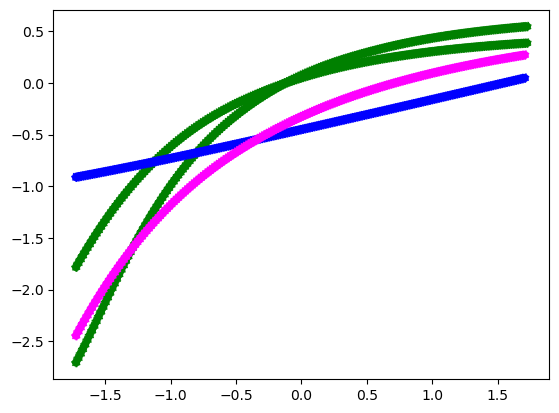

In [49]:
#trying things
#Plotting original data

plt.scatter(all_x.iloc[0:400, 0], all_y.iloc[0:400, 0], label='C_x', linestyle="dotted", color = 'green')
plt.scatter(all_x.iloc[0:199, 0], all_y.iloc[0:199, 1], label='C_N', linestyle="dotted", color = 'blue')
plt.scatter(all_x.iloc[0:199, 0], all_y.iloc[0:199, 2], label='C_L', linestyle="dotted", color = 'magenta')



# Biomass graphs

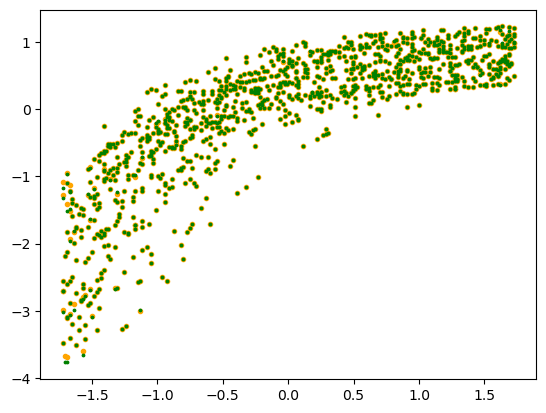

In [31]:
#more trying stuff code
#plotting predictions

#extract data from mean predictions array
C_X_pred = [value[0] for value in mean_prediction]

#plotting C_X predictions against the testing data
plt.scatter(x_test.iloc[0:1100, 0], C_X_pred[0:1100], color = 'orange', s = 9)
plt.scatter(x_test.iloc[0:1100, 0], y_test.iloc[0:1100, 0], color = 'green', s = 3)

Text(0.5, 1.0, 'Gaussian process regression (predictions of C_X vs observed C_X)')

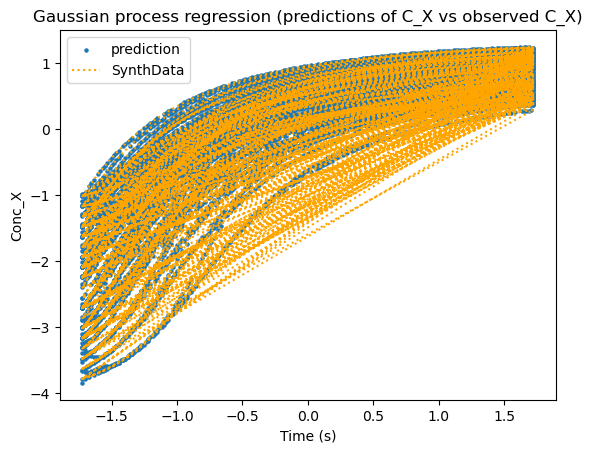

In [61]:
#plotting predictions for all C_X against 1 actual time series in the original data
plt.scatter(x_test.iloc[: , 0], C_X_pred, label="prediction", s = 5)
plt.plot(all_x.iloc[:, 0], all_y.iloc[:, 0], label='SynthData', linestyle="dotted", color = 'orange', 
         linewidth = 1.5)

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Conc_X")
plt.title("Gaussian process regression (predictions of C_X vs observed C_X)")

## N Graphs

Text(0.5, 1.0, 'Gaussian process regression (predictions of C_N vs observed C_N)')

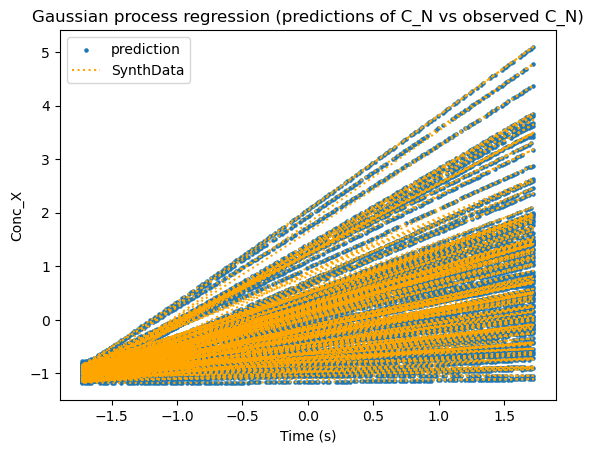

In [73]:
C_N_pred = [item[1] for item in mean_prediction]

plt.scatter(x_test.iloc[: , 0], C_N_pred, label="prediction", s = 5)
plt.plot(all_x.iloc[:, 0], all_y.iloc[:, 1], label='SynthData', linestyle="dotted", color = 'orange', 
         linewidth = 1.5)

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Conc_X")
plt.title("Gaussian process regression (predictions of C_N vs observed C_N)")


## Luetin Graphs

Text(0.5, 1.0, 'Gaussian process regression (predictions of C_L vs observed C_L)')

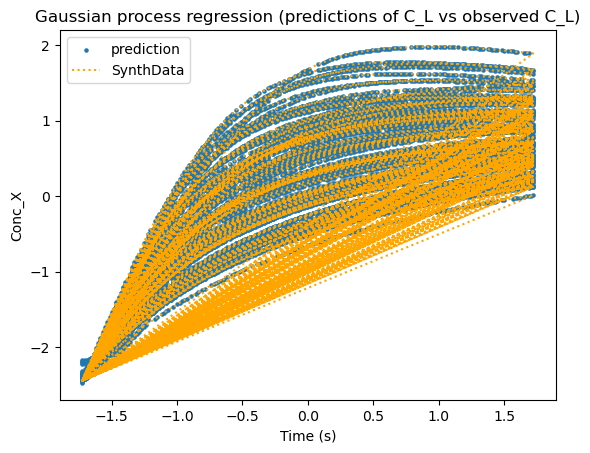

In [74]:
C_L_pred = [thing[2] for thing in mean_prediction]

plt.scatter(x_test.iloc[: , 0], C_L_pred, label="prediction", s = 5)
plt.plot(all_x.iloc[:, 0], all_y.iloc[:, 2], label='SynthData', linestyle="dotted", color = 'orange', 
         linewidth = 1.5)

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Conc_X")
plt.title("Gaussian process regression (predictions of C_L vs observed C_L)")
